In [2]:
import sys
import os
import time
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import traceback

# Add parent directory to path
notebook_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_path, '..'))
sys.path.append(parent_dir)
print(f"Added {parent_dir} to Python path")

# Import required modules
from src.instruments import connect_arc_two, PulseSequence
from src.measurement import IVCurveMeasurement
from src.measurement import LTPLTDMeasurement
import src.analysis.plotting as plotting
from src.instruments import connect_arc_two
from src.measurement.crossbar import Crossbar
from src.measurement.pulse import PulseMeasurement
from src.instruments import pulse_patterns
from src.utils.data_io import save_measurement_results

toml_config_file = None


# Connect to ArC Two
arc = connect_arc_two()

Added /scratch/renj/Arc2/Arc2 to Python path
Using ArC Two device: 0
Using firmware: /home/abaigol/.local/share/arc2control/firmware/efm03_20240918.bin
Successfully connected to ArC Two board.


In [2]:
arc.ground_all()
arc.execute

arc.float_all().execute()


# IV config

Using pins: Row=18, Column=13

--- IV Sweep Configuration Summary ---
Sweep type: full
Voltage range: ±-0.5V
Number of steps: 50
Target device: pins 18-13

=== IV Sweep Visualization ===


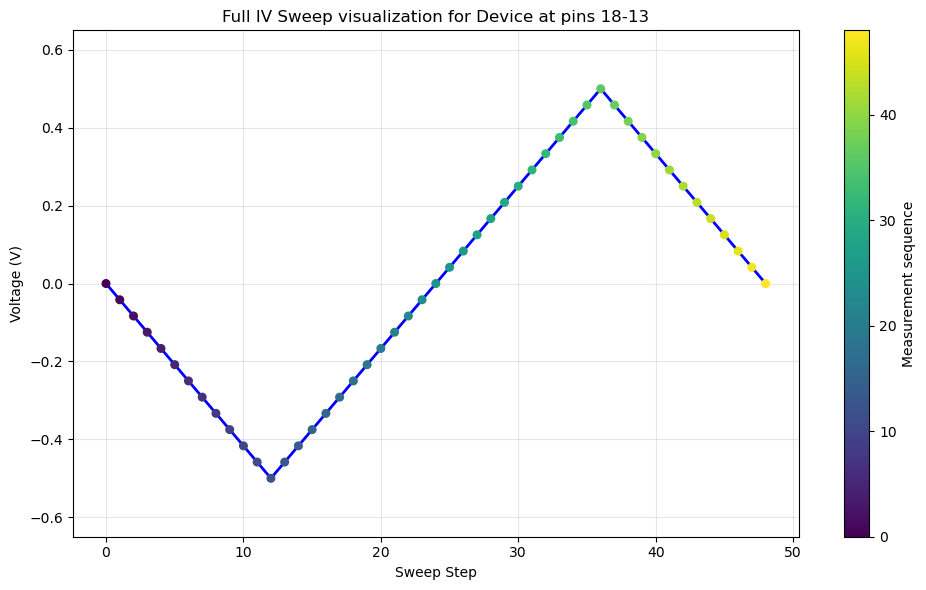

In [4]:
# Set up pins for the test
row_pin = 18  # High pin
col_pin = 13  # Low pin
print(f"Using pins: Row={row_pin}, Column={col_pin}")

# Create measurement handler
iv_handler = IVCurveMeasurement(arc)

# Define sweep parameters
max_voltage = -0.5    # Maximum voltage magnitude (V) # todo min and max
steps = 50         # Number of voltage steps
sweep_type = "full"  # Options: "hysteresis", "full", "positive", "negative"
compliance_current = 1e-3  # Maximum allowed current (A)

# Print configuration summary
print(f"\n--- IV Sweep Configuration Summary ---")
print(f"Sweep type: {sweep_type}")
print(f"Voltage range: ±{max_voltage}V")
print(f"Number of steps: {steps}")
# print(f"Compliance current: {compliance_current}A")
print(f"Target device: pins {row_pin}-{col_pin}")

# Visualize the sweep pattern before execution
print(f"\n=== IV Sweep Visualization ===")
fig, ax, voltages = plotting.visualize_iv_sweep(
    max_voltage=max_voltage,
    steps=steps,
    sweep_type=sweep_type,
    title=f"{sweep_type.title()} IV Sweep visualization for Device at pins {row_pin}-{col_pin}"
)


Measurement complete. 197 data points collected.
Voltage range: -0.50V to 0.50V
Current range: -1.61e-04A to 6.00e-05A

Plotting results...
Plot saved to figures/iv_measurement_VCM_R5_B25full_20250609_155006.png


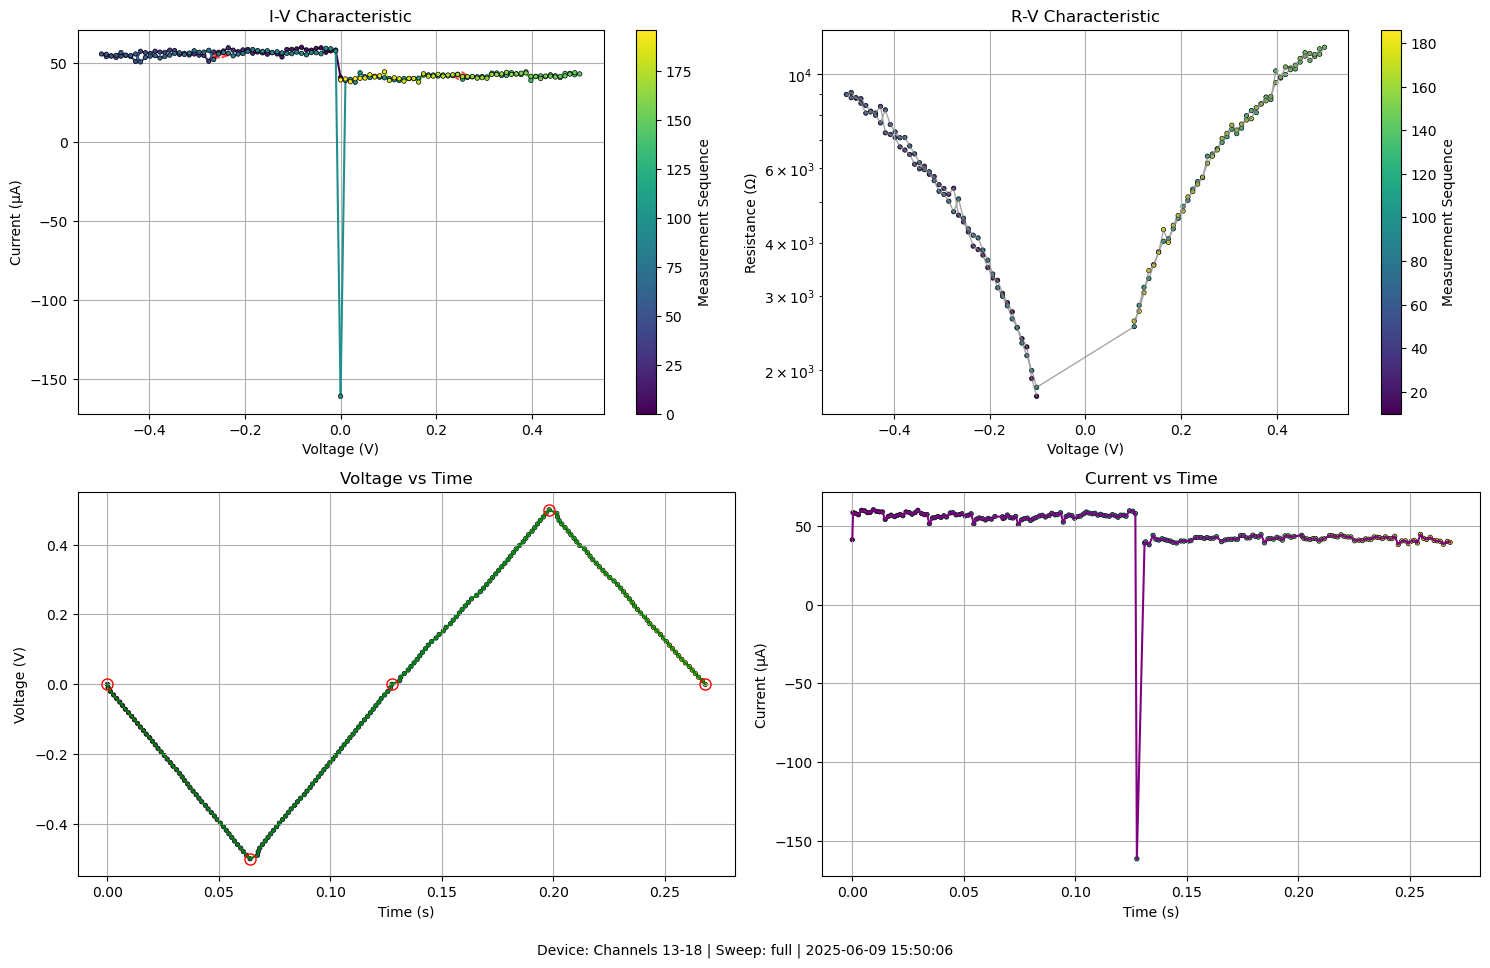

Results saved to results/iv_measurement_VCM_R5_B25full_20250609_155006.h5

Test complete. All pins grounded.


In [66]:
try:    
    result = iv_handler.sweep(
            row_pin=row_pin,
            column_pin=col_pin,
            sweep_type=sweep_type,
            voltage_range=(-max_voltage, max_voltage),  
            steps=steps,
            compliance_current=1e-3
        )

    # Print measurement summary
    if result:
        print(f"\nMeasurement complete. {len(result.voltages)} data points collected.")
        print(f"Voltage range: {min(result.voltages):.2f}V to {max(result.voltages):.2f}V")
        print(f"Current range: {min(result.currents):.2e}A to {max(result.currents):.2e}A")
        
        # Plot the results
        print("\nPlotting results...")
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"iv_measurement_VCM_R5_B25{sweep_type}_{timestamp}"
        iv_handler.plot_iv_curves(result, save_plot=True, filename=filename) 
        iv_handler.save_results(result, filename, format="h5")

except Exception as e:
    print(f"Error: {e}")
    traceback.print_exc()

finally:
    # Ground all pins for safety
    arc.ground_all()
    arc.execute()
    arc.wait()
    print("\nTest complete. All pins grounded.")

# Fully arbitrary

Using pins: Row=18, Column=13
DEBUG: Sequence data keys: ['write', 'read', 'all_pulses', 'original_pulses', 'write_pulses', 'read_pulses', 'read_indices', 'sequence', 'period', 'read_voltage', 'read_pulse_width', 'read_pulse_offset', 'write_read_delay', 'inter_pulse_delay', 'differential', 'duration']
DEBUG: Found 5 pulses
DEBUG: Max pulse end time: 3.90 ms
DEBUG: Total duration with buffer: 4.29 ms
DEBUG: Calculated total duration: 4.29 ms


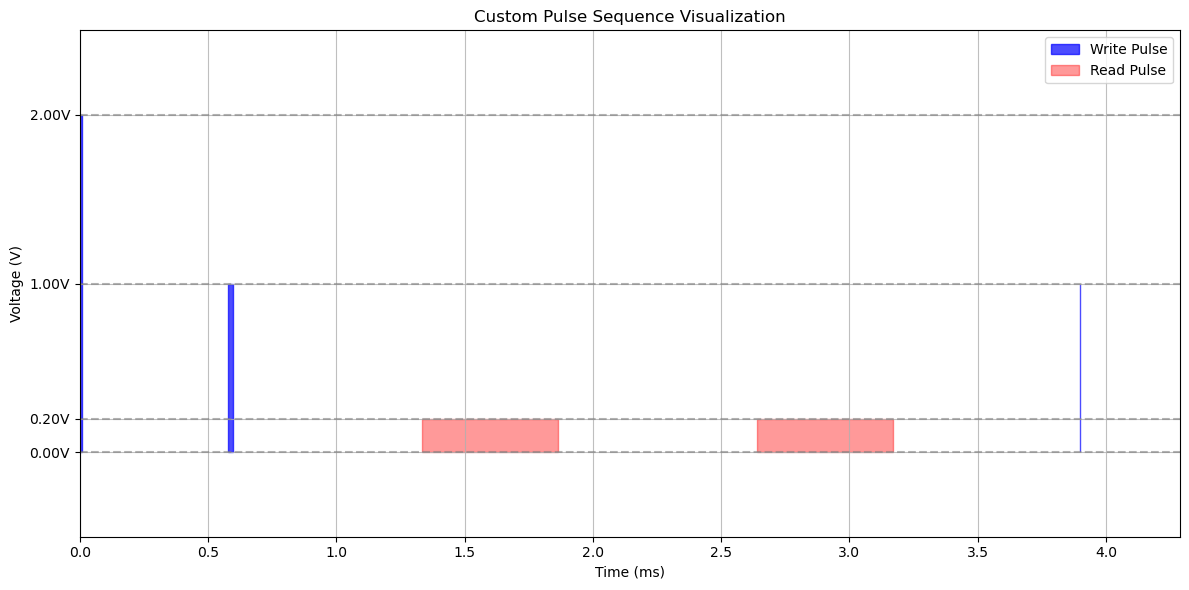

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Custom Pulse Sequence Visualization'}, xlabel='Time (ms)', ylabel='Voltage (V)'>)

In [3]:
pulse_handler = PulseMeasurement(arc)

row_pin = 18
col_pin = 13
print(f"Using pins: Row={row_pin}, Column={col_pin}")

# voltages = [1,0.3, 0.6, -1.2, 0.1]
# types = ['write','read', 'write', 'write', 'read']
# pulse_widths = [500_000,None, 50_000, 100_000, None]
# delays = [100000,30000,0,500000,250]

voltages = [2,1,0.2,0.2,1]
types = ['write', 'write', 'read','read','write']
pulse_widths = [1_0000,2_0000,None,None,1_000]
delays = [500_000,500_000,500_000,500_000,500_000]


seq = PulseSequence.build_relative_pulse_sequence(voltages, types, pulse_widths, delays)

pulse_handler.visualize_pulse_sequence(seq)



Write: 2.000V → 2.022V (comp=1.01)
Write: 1.000V → 1.000V (comp=1.00)
read pulse:0.2V
read pulse:0.2V
Write: 1.000V → 1.144V (comp=1.14)
Retrieved 2 readings from hardware
First reading data structure: [array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, -0.00404273,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
     

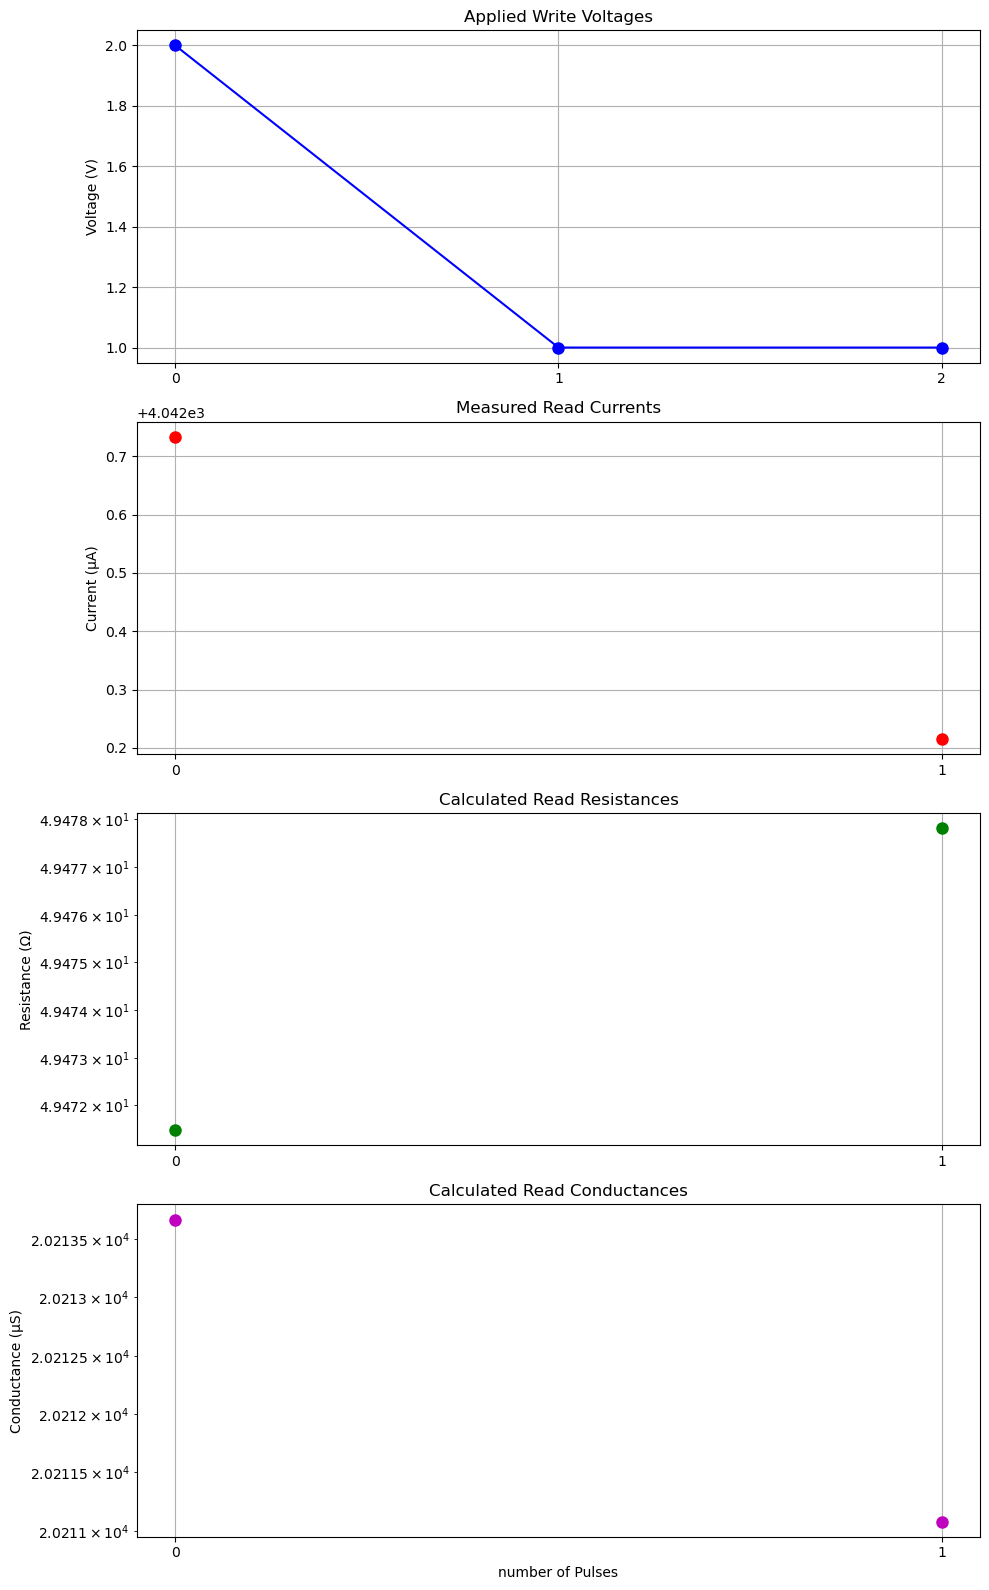

Results saved to results/pulse_measurement_20250611_163155.h5


'results/pulse_measurement_20250611_163155.h5'

In [4]:
result = pulse_handler.run_relative_sequence(
    row_pin,
    col_pin,
    seq,
    differential=True,
    debug=True)

filename = f"pulse_measurement_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
plotting.plot_measurement_results(result, save_plot=True, filename=filename)
save_measurement_results(result, filename=filename, format="h5")


DEBUG: Sequence data keys: ['write', 'read', 'all_pulses', 'original_pulses', 'write_pulses', 'read_pulses', 'read_indices', 'sequence', 'period', 'read_voltage', 'read_pulse_width', 'read_pulse_offset', 'write_read_delay', 'inter_pulse_delay', 'differential', 'duration']
DEBUG: Found 28 pulses
DEBUG: Max pulse end time: 15.77 ms
DEBUG: Total duration with buffer: 17.35 ms
DEBUG: Calculated total duration: 17.35 ms


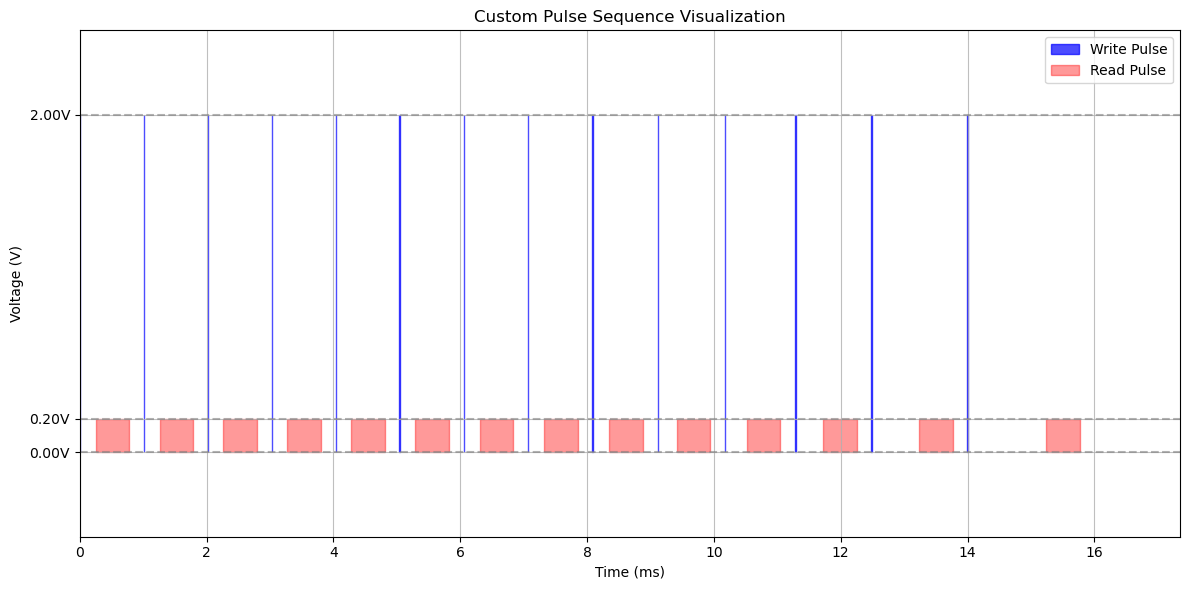

Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Write: 2.000V → 2.022V (comp=1.01)
read pulse:0.2V
Retrieved 14 readings from hardware
First reading data structure: [array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, -0.00403845,         nan,
   

In [6]:
delays_ns = [0, 100, 200, 500, 1_000, 2_000, 5_000, 10_000, 20_000, 50_000, 100_000, 200_000, 500_000, 1_000_000]
write_pw = 10_000  # 10 us for easy oscilloscope detection

all_voltages = []
all_types = []
all_pulse_widths = []
all_delays = []

for d in delays_ns:
    # Write pulse
    all_voltages.append(2)
    all_types.append('write')
    all_pulse_widths.append(write_pw)
    all_delays.append(d)
    # Read pulse (for reference, always after write)
    all_voltages.append(0.2)
    all_types.append('read')
    all_pulse_widths.append(None)  # Will be set to 530_000 ns by enforcement
    all_delays.append(0)  # No delay after read

seq = PulseSequence.build_relative_pulse_sequence(all_voltages, all_types, all_pulse_widths, all_delays)
pulse_handler.visualize_pulse_sequence(seq)

result = pulse_handler.run_relative_sequence(
    row_pin,
    col_pin,
    seq,
    differential=True,
    debug=True)


# LTP/LTD

Using pins: Row=18, Column=13

=== Running LTP/LTD Test ===
Visualizing LTP/LTD sequence:
DEBUG: Sequence data keys: ['write', 'read', 'all_pulses', 'original_pulses', 'write_pulses', 'read_pulses', 'read_indices', 'sequence', 'period', 'read_voltage', 'read_pulse_width', 'read_pulse_offset', 'write_read_delay', 'inter_pulse_delay', 'differential', 'duration']
DEBUG: Found 21 pulses
DEBUG: Max pulse end time: 7.83 ms
DEBUG: Total duration with buffer: 8.83 ms
DEBUG: Calculated total duration: 8.83 ms


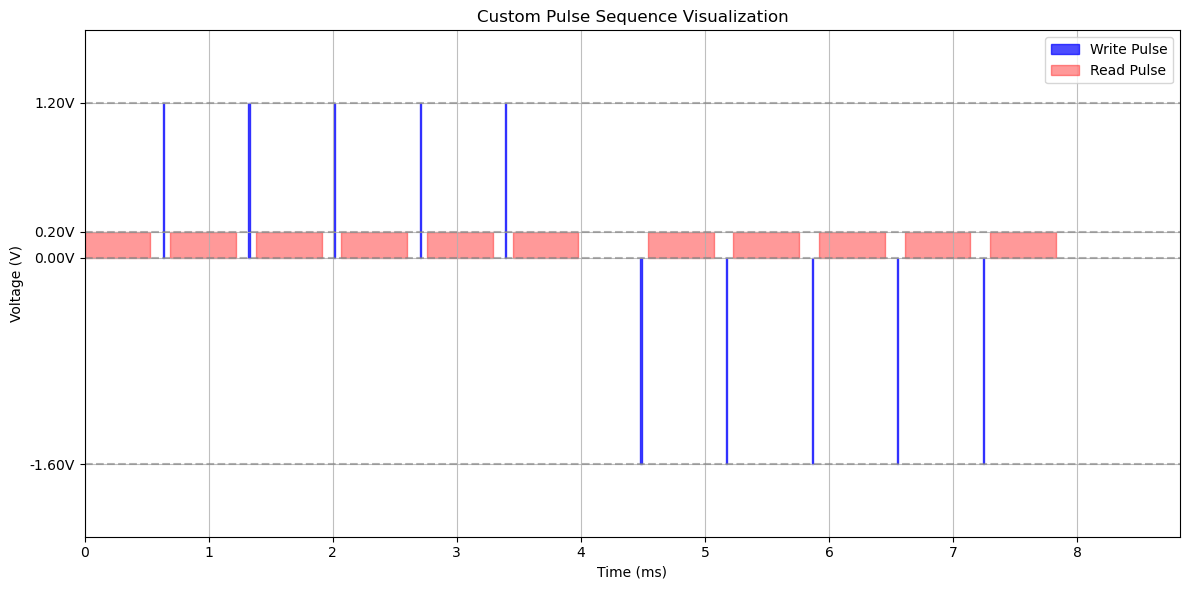

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Custom Pulse Sequence Visualization'}, xlabel='Time (ms)', ylabel='Voltage (V)'>)

In [ ]:


pulse_handler = PulseMeasurement(arc)

row_pin = 18
col_pin = 13
print(f"Using pins: Row={row_pin}, Column={col_pin}")

print("\n=== Running LTP/LTD Test ===")

# Configure LTP/LTD parameters
ltp_voltages = np.linspace( 1.2, 1.2, 50)  
ltd_voltages = np.linspace(-1.6, -1.6, 50)  
sweep_voltage = max(ltp_voltages)  
read_voltage = 0.2
pulse_width_ns = 10_000
read_delay_ns=100_000,  
write_delay_ns=50_000,  
inter_phase_delay_ns=500_000 

# Generate sequence lists
voltages, types, pulse_widths, delays = pulse_patterns.create_ltp_ltd_sequence_new(
    read_voltage=read_voltage,
    ltp_voltages=ltp_voltages,
    ltd_voltages=ltd_voltages,
    pulse_width_ns=pulse_width_ns,  
    read_delay_ns=read_delay_ns,  
    write_delay_ns=write_delay_ns,  
    inter_phase_delay_ns=inter_phase_delay_ns
)

# Build the sequence
ltp_ltd_seq = PulseSequence.build_relative_pulse_sequence(
    voltages, types, pulse_widths, delays)

# Visualize the sequence
print("Visualizing LTP/LTD sequence:")
pulse_handler.visualize_pulse_sequence(ltp_ltd_seq)



Using simple mapping for loaded data
Debug: write_to_read_mapping = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Debug: number of writes = 10
Debug: number of reads = 11
Debug: number of current measurements = 11
Plot saved to figures/ltp_ltd_test_pw_10000ns_v_1.2V_20250609_171648.png


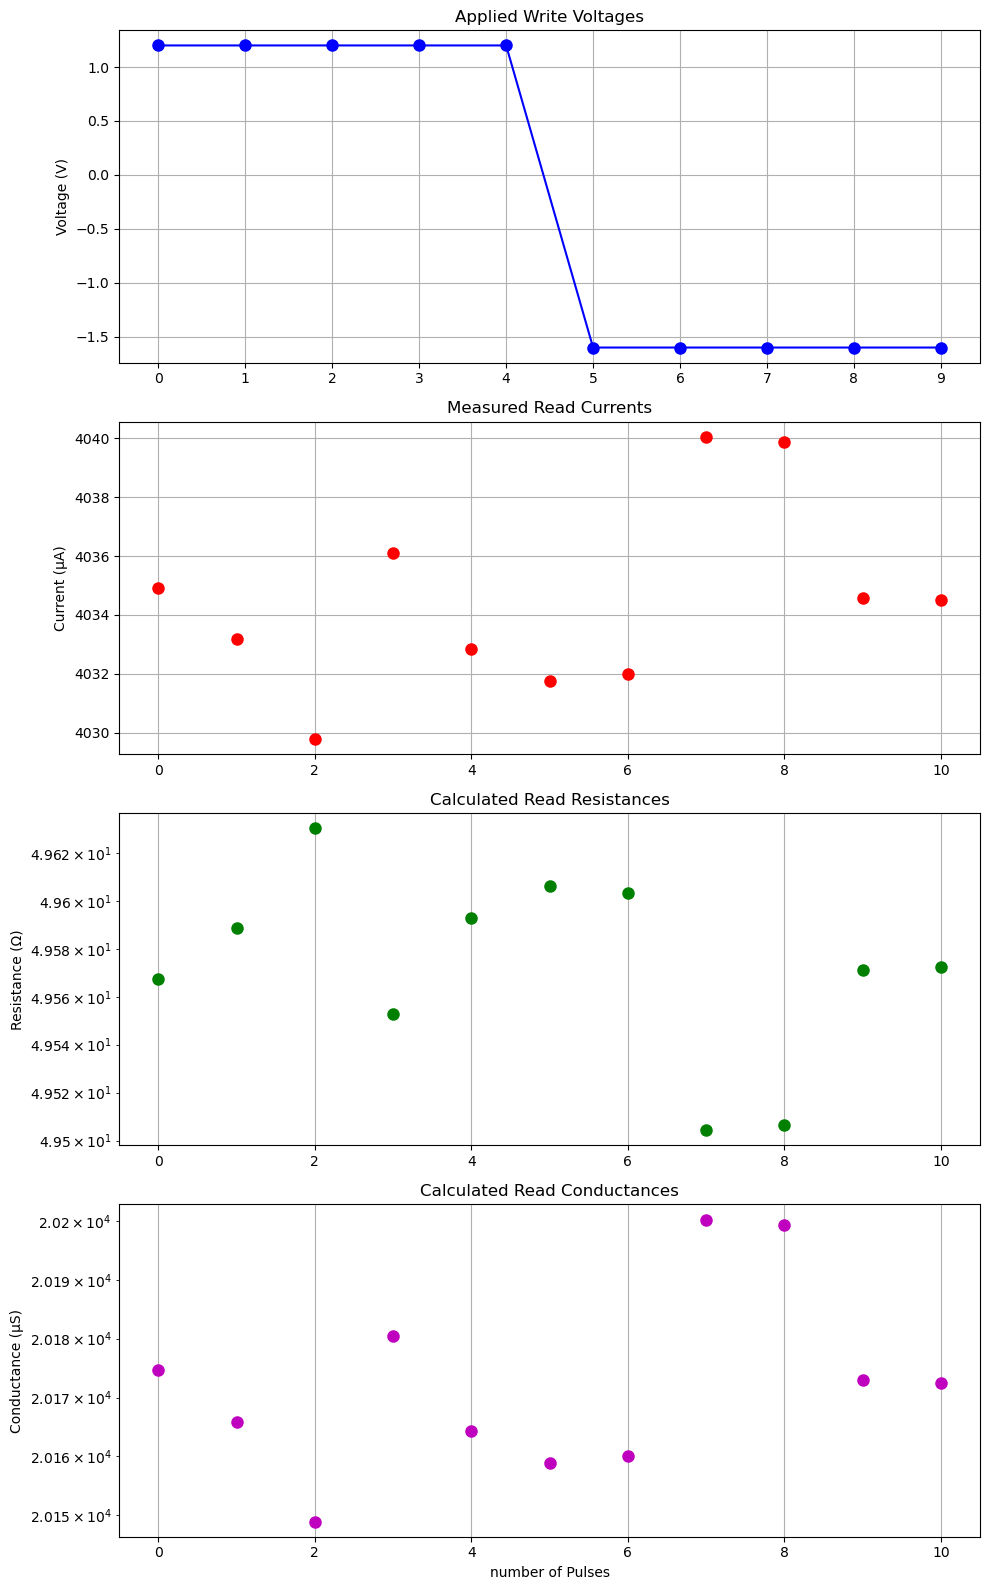

Results saved to results/ltp_ltd_test_pw_10000ns_v_1.2V_20250609_171648.h5


'results/ltp_ltd_test_pw_10000ns_v_1.2V_20250609_171648.h5'

In [7]:
# Run sequence
result_ltp_ltd = pulse_handler.run_relative_sequence(
    row_pin,
    col_pin,
    ltp_ltd_seq,
    differential=True,
    debug=False
)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename=f"ltp_ltd_test_pw_{pulse_width_ns}ns_v_{sweep_voltage}V_{timestamp}"

plotting.plot_measurement_results(result_ltp_ltd, save_plot=True,filename=filename)
save_measurement_results(result_ltp_ltd, filename=filename, format="h5")

Loading measurement data from /scratch/renj/Arc2/Arc2/examples/results/ltp_ltd_test_pw_5000ns_v_1.2V_20250604_175546.h5
Using simple mapping for loaded data
Debug: write_to_read_mapping = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99}
Debug: number of writes = 100
D

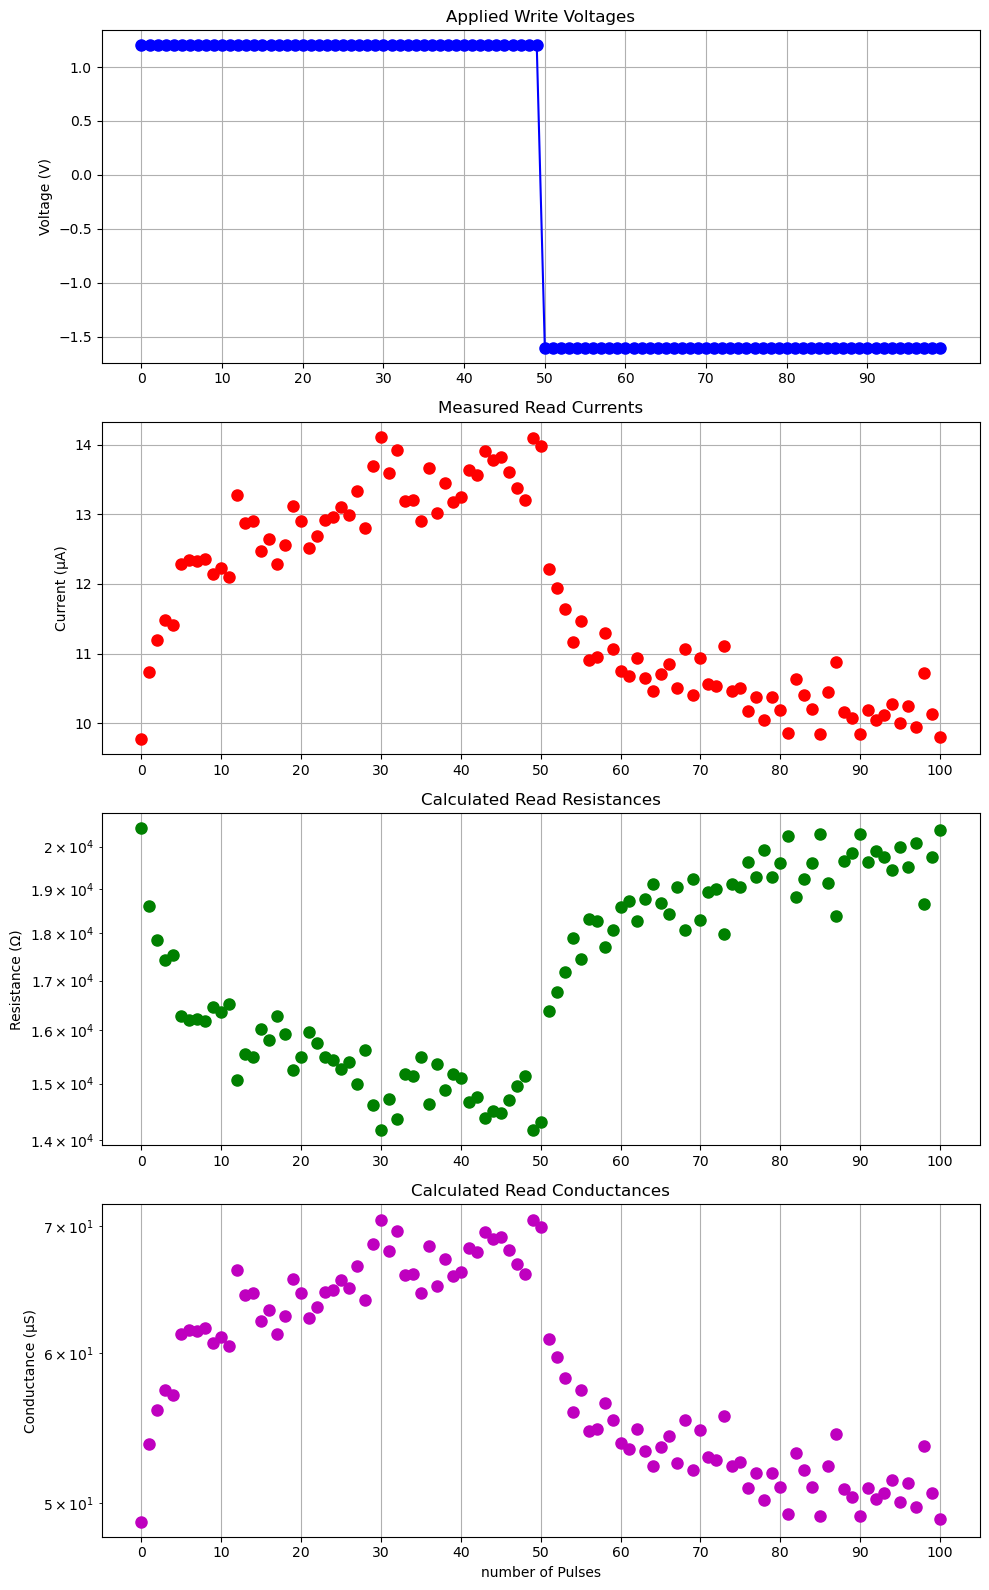

In [8]:
from src.utils.data_io import load_measurement_results
import src.analysis.plotting as plotting

# Load the data
filename = "ltp_ltd_test_pw_5000ns_v_1.2V_20250604_175546.h5"  
result = load_measurement_results(filename)

# Replot with updated plotting function
plotting.plot_measurement_results(result, save_plot=True, filename=f"{filename}_replot")



# Retention

Using pins: Row=18, Column=13

=== Running Retention Test ===
Total test duration: approximately 0.0 minutes
Visualizing retention sequence:
DEBUG: Sequence data keys: ['write', 'read', 'all_pulses', 'original_pulses', 'write_pulses', 'read_pulses', 'read_indices', 'sequence', 'period', 'read_voltage', 'read_pulse_width', 'read_pulse_offset', 'write_read_delay', 'inter_pulse_delay', 'differential', 'duration']
DEBUG: Found 251 pulses
DEBUG: Max pulse end time: 88.00 ms
DEBUG: Total duration with buffer: 96.80 ms
DEBUG: Calculated total duration: 96.80 ms


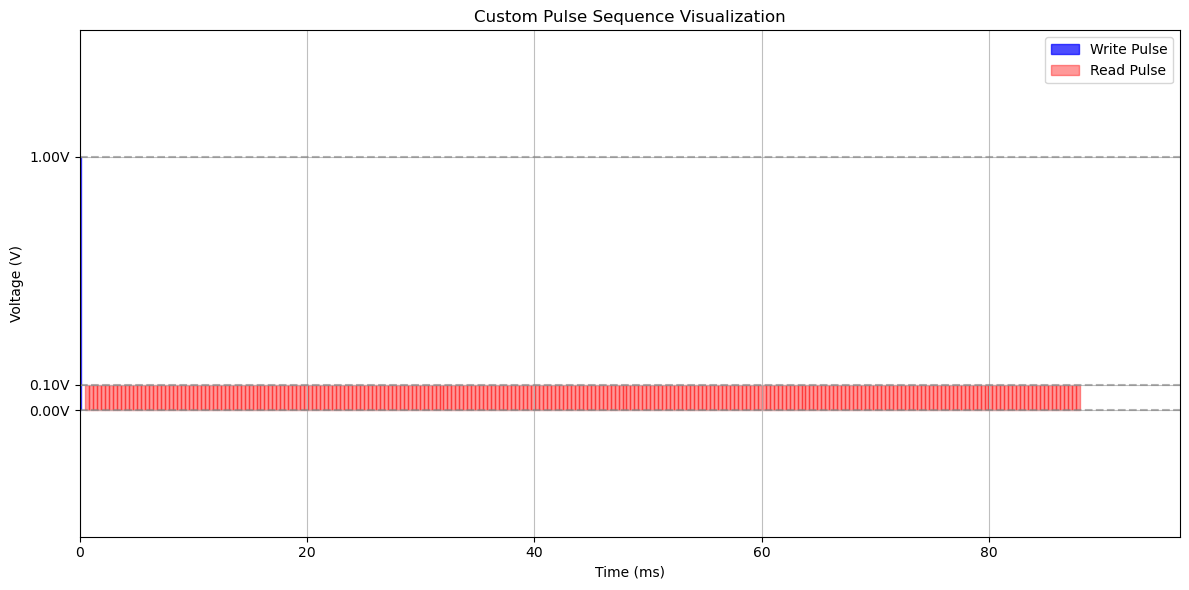

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Custom Pulse Sequence Visualization'}, xlabel='Time (ms)', ylabel='Voltage (V)'>)

In [26]:
pulse_handler = PulseMeasurement(arc)

row_pin = 18
col_pin = 13
print(f"Using pins: Row={row_pin}, Column={col_pin}")

print("\n=== Running Retention Test ===")

# Configure retention
set_voltage = 1  
read_voltage = 0.1  
set_pulse_width = 100_000 #in ns
# read_times_sec = [0.0005,0.01,0.02,0.03,0.04,0.05]
read_times_sec = [0.0005] + [0.0001 * i for i in range(1,250 )] #in s!!!

print(f"Total test duration: approximately {max(read_times_sec)/60:.1f} minutes")

# Generate sequence 
voltages, types, pulse_widths, delays = pulse_patterns.create_retention_sequence(
    set_voltage=set_voltage,
    read_voltage=read_voltage,
    set_pulse_width_ns=set_pulse_width,
    read_times_sec=read_times_sec
)

# Build the sequence
retention_seq = PulseSequence.build_relative_pulse_sequence(
    voltages, types, pulse_widths, delays)

# Visualize the sequence
print("Visualizing retention sequence:")
pulse_handler.visualize_pulse_sequence(retention_seq)

Write: 1.000V → 1.000V (comp=1.00)
Raw delay: 400.0μs, Calibrated: 156.0μs
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.1V
read pulse:0.

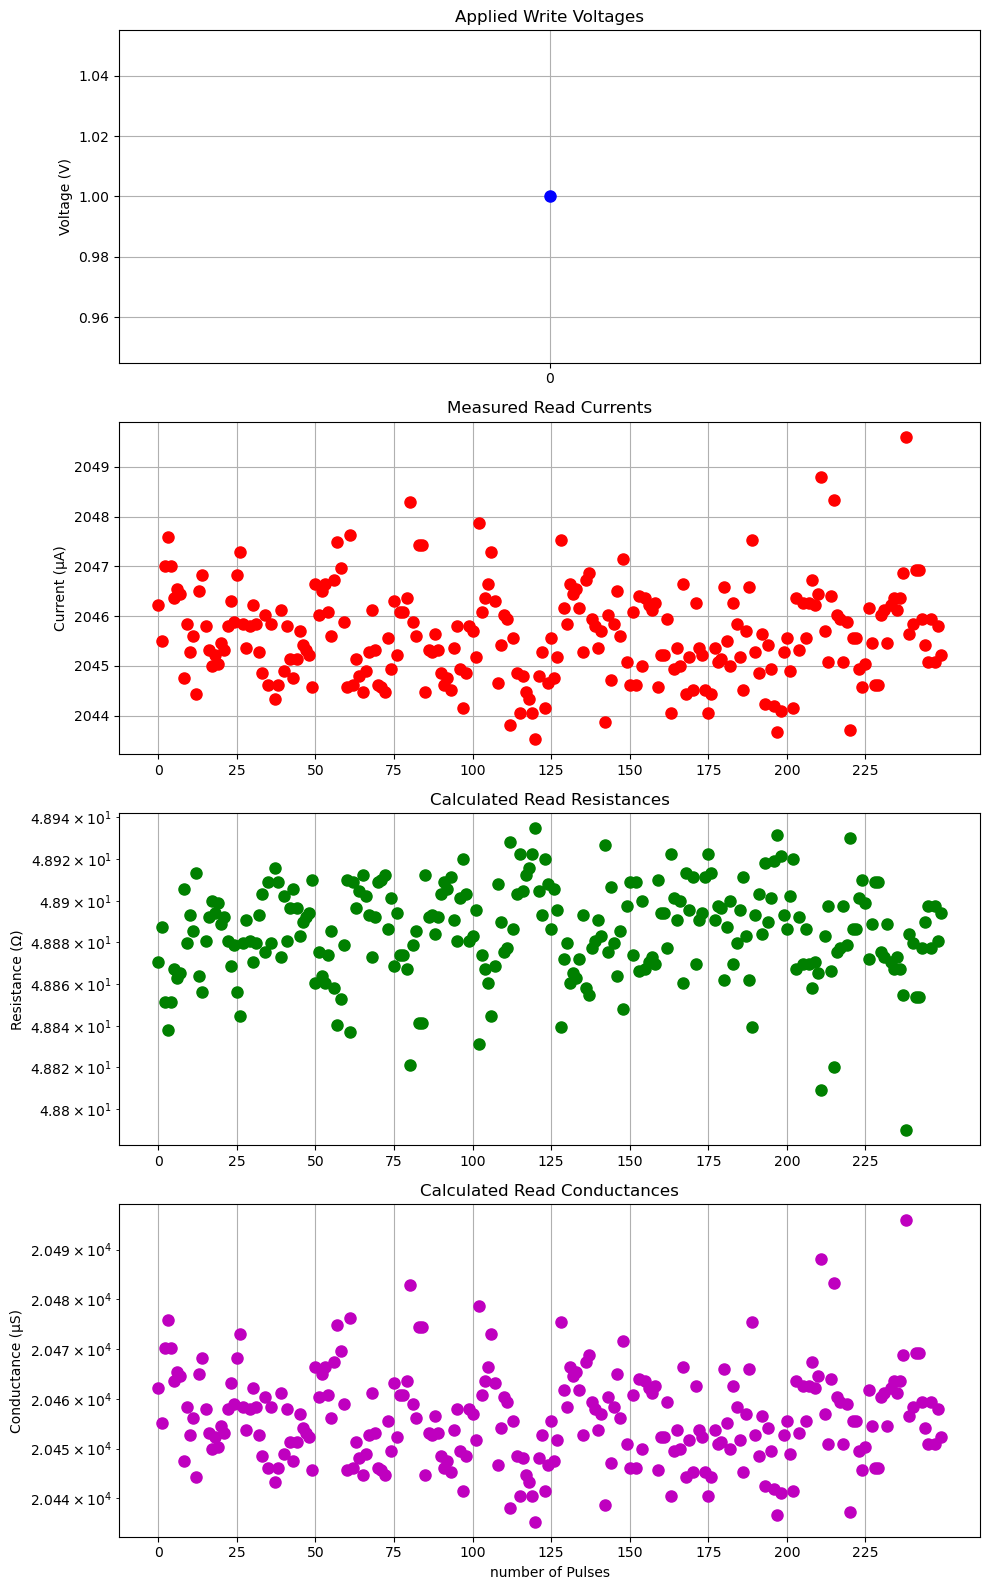

Results saved to results/retention_test_20250607_192057.h5


'results/retention_test_20250607_192057.h5'

In [27]:
# Run the sequence
result_retention = pulse_handler.run_relative_sequence(
    row_pin,
    col_pin,
    retention_seq,
    differential=True,
    debug=True
)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename=f"retention_test_{timestamp}"
# Plot standard results
plotting.plot_measurement_results(result_retention, 
                                 save_plot=True, 
                                 filename=filename)

save_measurement_results(result_retention, filename=filename, format="h5")

# endurance

Using pins: Row=18, Column=13

=== Running Endurance Test ===
Visualizing endurance sequence:
DEBUG: Sequence data keys: ['write', 'read', 'all_pulses', 'original_pulses', 'write_pulses', 'read_pulses', 'read_indices', 'sequence', 'period', 'read_voltage', 'read_pulse_width', 'read_pulse_offset', 'write_read_delay', 'inter_pulse_delay', 'differential', 'duration']
DEBUG: Found 53 pulses
DEBUG: Max pulse end time: 41.19 ms
DEBUG: Total duration with buffer: 45.31 ms
DEBUG: Calculated total duration: 45.31 ms


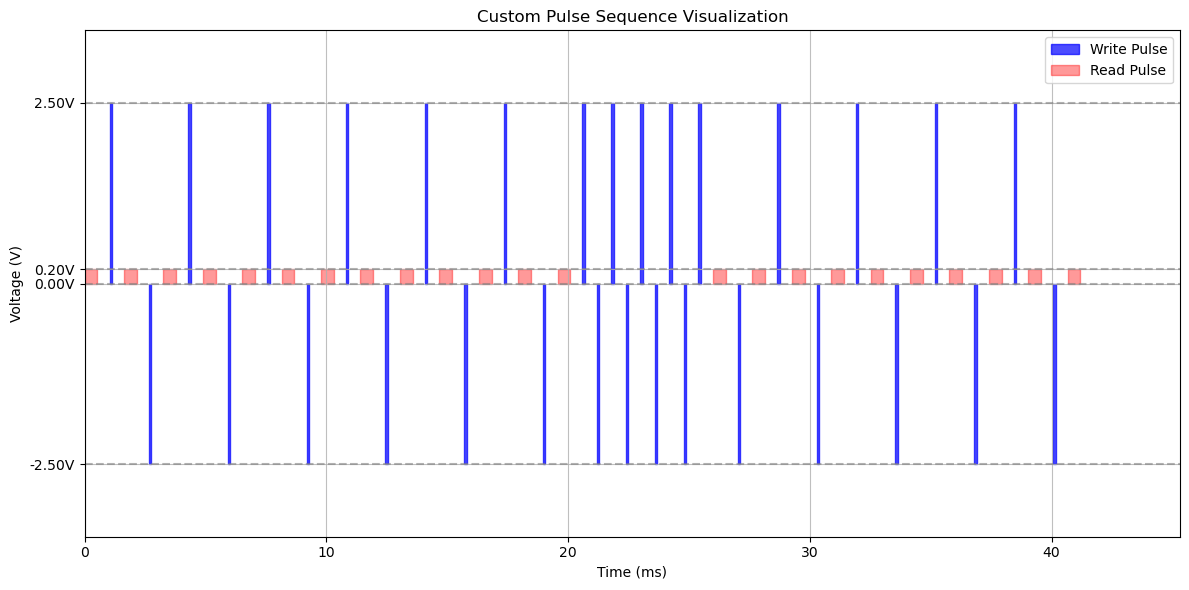

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Custom Pulse Sequence Visualization'}, xlabel='Time (ms)', ylabel='Voltage (V)'>)

In [9]:

pulse_handler = PulseMeasurement(arc)

row_pin = 18
col_pin = 13
print(f"Using pins: Row={row_pin}, Column={col_pin}")

print("\n=== Running Endurance Test ===")


# Configure endurance test
num_cycles = 15
set_voltage = 2.5
reset_voltage = -2.5
read_voltage = 0.2

# Generate sequence 
voltages, types, pulse_widths, delays = pulse_patterns.create_endurance_sequence(
    num_cycles=num_cycles,
    set_voltage=set_voltage,
    reset_voltage=reset_voltage,
    read_voltage=read_voltage,
    pulse_width_ns=100_000,  # in ns
    std_delay_ns=500_000,    # in ns
    read_interval=5  # only read in intervals, first and last part are alwyas read
)

# Build the sequence
endurance_seq = PulseSequence.build_relative_pulse_sequence(
    voltages, types, pulse_widths, delays)

# Visualize sequence
print(f"Visualizing endurance sequence:")
pulse_handler.visualize_pulse_sequence(endurance_seq)




Running 15 SET/RESET cycles (this may take a while)...
Using simple mapping for loaded data
Debug: write_to_read_mapping = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22}
Debug: number of writes = 30
Debug: number of reads = 23
Debug: number of current measurements = 23
Plot saved to figures/endurance_test_20250607_185208.png


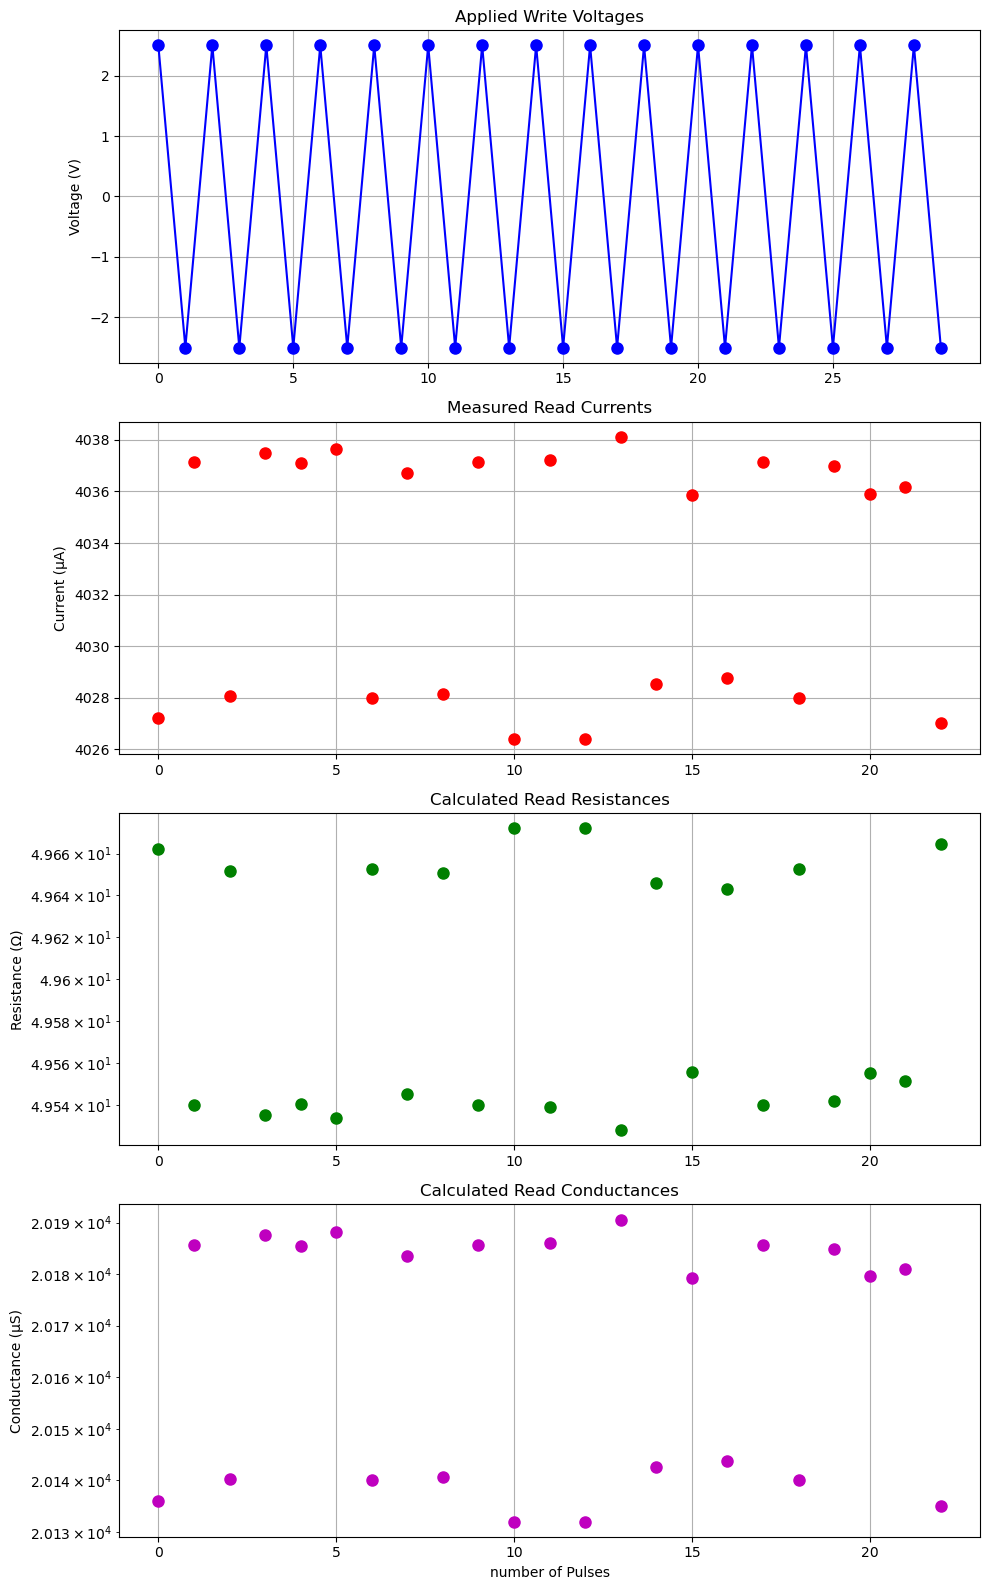

In [12]:
# Run the sequence
print(f"Running {num_cycles} SET/RESET cycles (this may take a while)...")
result_endurance = pulse_handler.run_relative_sequence(
    row_pin,
    col_pin,
    endurance_seq,
    differential=True,
    debug=False
)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# Plot standard results
plotting.plot_measurement_results(result_endurance, 
                                 save_plot=True, 
                                 filename=f"endurance_test_{timestamp}")

# Crossbar

In [ ]:
# Define crossbar parameters 
#toml_config_file = "crossbar_config/2x2.toml"  # uncomment for manual config
#manual config
rows = 2  # Default number of rows
cols = 2  # Default number of columns
row_pins = [13, 14]  # Default row pins
col_pins = [17, 18]  # Default column pins
read_voltage = 0.1  # Voltage used for reading (V)
max_current = 1e-3  # Compliance current (A)
debug = False

# Initialize the crossbar
print(f"\n--- Crossbar Configuration ---")

# Single-line initialization that handles both TOML and manual config
crossbar = Crossbar.from_config_file(
    instrument=arc,
    config_file=toml_config_file,
    rows=rows,
    cols=cols,
    row_pins=row_pins,
    col_pins=col_pins,
    read_voltage=read_voltage,
    max_current=max_current
)

# Print final configuration
print(f"\n--- Crossbar Configuration ---")
print(f"Dimensions: {crossbar.rows}×{crossbar.cols}")
print(f"Row pins: {crossbar.row_pins}")
print(f"Column pins: {crossbar.col_pins}")
print(f"Read voltage: {read_voltage}V")
print(f"Compliance current: {max_current}A")
print("✓ Crossbar initialized")

# Initialize the crossbar
print(f"\nInitializing {rows}×{cols} crossbar...")
crossbar = Crossbar(
    instrument=arc,
    rows=rows, 
    cols=cols,
    row_pins=row_pins, 
    col_pins=col_pins,
    read_voltage=read_voltage,
    max_current=max_current
)
print("Crossbar initialized")

In [ ]:
try:
    
    # 1. Read and visualize crossbar conductance matrix
    print("\n=== Reading Conductance Matrix ===")
    conductance_matrix = crossbar.read_conductance_matrix(debug=debug)
    
    # Print the conductance results
    print("\nConductance matrix (S):")
    print(conductance_matrix)
    
    # Visualize conductance
    print("\nVisualizing crossbar conductance:")
    fig_c, ax_c = crossbar.visualize_crossbar(value_type='conductance', log_scale=True)
    
    # Calculate statistics
    avg_conductance = np.mean(conductance_matrix)
    print(f"Average conductance: {avg_conductance:.2e} S")
    print(f"Conductance range: {np.min(conductance_matrix):.2e} S to {np.max(conductance_matrix):.2e} S")
    
    # 2. Read and visualize crossbar resistance matrix
    print("\n=== Reading Resistance Matrix ===")
    resistance_matrix = crossbar.read_resistance_matrix(debug=debug)
    
    # Print the resistance results
    print("\nResistance matrix (Ω):")
    print(resistance_matrix)
    
    # Visualize resistance
    print("\nVisualizing crossbar resistance:")
    fig_r, ax_r = crossbar.visualize_crossbar(value_type='resistance', log_scale=True)
    
    # Calculate statistics (excluding infinite values)
    finite_resistances = resistance_matrix[np.isfinite(resistance_matrix)]
    if len(finite_resistances) > 0:
        avg_resistance = np.mean(finite_resistances)
        print(f"Average resistance: {avg_resistance:.2e} Ω")
        print(f"Resistance range: {np.min(finite_resistances):.2e} Ω to {np.max(finite_resistances):.2e} Ω")
    else:
        print("No finite resistance values detected")
    
    # 3. Demonstrate Vector-Matrix Multiplication (VMM) capabilities
    print("\n=== Configuring VMM Operation ===")
    input_vector = np.array([0.8, 0.5])  # Example input vector
    print(f"Input vector: {input_vector}")
    print(f"Input vector shape: {input_vector.shape}")
    print(f"Expected shape matches columns: {'Yes' if len(input_vector) == cols else 'No'}")
    
    # Create and visualize VMM configuration
    vmm_config = crossbar.create_vmm_config(
        input_vector=input_vector,
        read_duration=1000,  # Read pulse duration in ns
        ground_unused=True,  # Whether to ground unused columns
        debug=debug
    )
    
    # Visualize the VMM configuration
    print("\nVisualizing VMM configuration:")
    crossbar.visualize_vmm_config(vmm_config)
    
    # Execute the VMM operation
    print("\n=== Executing VMM Operation ===")
    result = crossbar.vmm_operation(
        input_vector=input_vector,
        ground_unused=True,
        differential=False,
        visualize=True,
        debug=debug
    )
    
    # Display the VMM result
    print("\nVMM result vector:")
    print(result)
    
    # Compare with analytical expectation
    print("\n=== Comparing VMM Results ===")
    comparison = crossbar.compare_vmm_results(result, input_vector)
    print(f"Analytical result (expected): {comparison['analytical_result']}")
    print(f"Measured result (actual): {comparison['measured_result']}")
    print(f"Absolute error: {comparison['absolute_error']}")
    print(f"Relative error (%): {comparison['relative_error']}")
    print(f"Mean absolute error: {comparison['mean_absolute_error']:.2e}")
    print(f"Mean relative error: {comparison['mean_relative_error']:.2f}%")
    
    # 4. Save and load crossbar state
    # Create results directory if it doesn't exist
    results_dir = os.path.join(os.getcwd(), "results")
    os.makedirs(results_dir, exist_ok=True)
    
    # Save the current crossbar state
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = os.path.join(results_dir, f"crossbar_state_{timestamp}.h5")
    print(f"\n=== Saving Crossbar State ===")
    print(f"Saving to {filename}...")
    saved_path = crossbar.save_conductance_matrix(filename)
    print(f"✓ Saved to: {saved_path}")
    
    # Load the saved crossbar state
    print(f"\n=== Loading Crossbar State ===")
    print(f"Loading from {saved_path}...")
    metadata = crossbar.load_conductance_matrix(saved_path)
    print("✓ Loaded successfully")
    print("Metadata:")
    for key, value in metadata.items():
        print(f"  {key}: {value}")
    
    print("\n=== Testing Different Sneak Path Mitigation Schemes ===")
    
    # Define a consistent input vector for testing
    input_vector = np.array([0.8, 0.5])
    print(f"Input vector: {input_vector}")
    
    # Define the mitigation schemes to test
    mitigation_schemes = ["none", "ground_unused", "v_2", "v_3"]
    
    # Store results for comparison
    results = {}
    comparisons = {}
    
    # Test each scheme
    for scheme in mitigation_schemes:
        print(f"\n--- Testing mitigation scheme: {scheme} ---")
        
        # Execute VMM with this scheme
        result = crossbar.vmm_operation(
            input_vector=input_vector,
            sneak_path_mitigation=scheme,
            differential=False,
            visualize=False,
            debug=True
        )
        
        # Store the result
        results[scheme] = result
        
        # Compare with analytical expectation
        comparison = crossbar.compare_vmm_results(result, input_vector)
        comparisons[scheme] = comparison
        
        # Print the key metrics
        print(f"Measured result: {comparison['measured_result']}")
        print(f"Mean absolute error: {comparison['mean_absolute_error']:.2e}")
        print(f"Mean relative error: {comparison['mean_relative_error']:.2f}%")
    
    # Create a summary comparison table
    print("\n=== Mitigation Scheme Comparison ===")
    print(f"{'Scheme':<15} {'Mean Abs Error':<18} {'Mean Rel Error':<18} {'Improvement':<15}")
    print("-" * 70)
    
    # Calculate improvement relative to no mitigation
    baseline_error = comparisons["none"]["mean_absolute_error"]
    
    for scheme in mitigation_schemes:
        error = comparisons[scheme]["mean_absolute_error"]
        rel_error = comparisons[scheme]["mean_relative_error"]
        improvement = ((baseline_error - error) / baseline_error * 100) if scheme != "none" else 0.0
        
        print(f"{scheme:<15} {error:.2e} {'':>8} {rel_error:.2f}% {'':>8} {improvement:.1f}%")
    
    # Visualize the results
    plt.figure(figsize=(12, 6))
    
    # Plot analytical vs measured results
    for i, scheme in enumerate(mitigation_schemes):
        analytical = comparisons[scheme]["analytical_result"]
        measured = comparisons[scheme]["measured_result"]
        
        x = np.arange(len(measured))
        width = 0.15
        offset = width * (i - len(mitigation_schemes)/2 + 0.5)
        
        plt.bar(x + offset, measured, width, label=f"{scheme} (measured)")
        
        # Only need analytical once since it's the same
        if i == 0:
            plt.bar(x + offset + width*len(mitigation_schemes), analytical, width, label="analytical", alpha=0.5)
    
    plt.xlabel("Output Row")
    plt.ylabel("Current (A)")
    plt.title("VMM Results with Different Sneak Path Mitigation Schemes")
    plt.legend()
    plt.xticks(x, [f"Row {i}" for i in range(len(measured))])
    plt.tight_layout()
    plt.show()

except Exception as e:
    import traceback
    print(f"Error: {e}")
    traceback.print_exc()
    
finally:
    # Ground all pins for safety
    arc.ground_all()
    arc.execute()
    arc.wait()
    print("\nTest complete. All pins grounded.")